# Copenhagen Airbnb Data (March 25-April 24, 2019)

## - Machine Learning - 

### Importing libraries

In [1]:
import warnings
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

### Fetching data

In [2]:
os.chdir(r"C:\Users\aleen\Desktop\Data Science\Data Mining, Machine Learning, Deep Learning\Exam Project\Data\Detailed\Listings")

In [3]:
df = pd.read_csv('airbnb_copenhagen_year')

In [4]:
df.head()

,id,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,a_few_days,no_response,within_a_day,within_a_few_hours,within_an_hour,flexible,moderate,strict_14_with_grace_period,super_strict_30,distance_to_center
0,6983,f,2,1.0,1.0,1.0,366.0,0.0,33.0,1,...,0,1,0,0,0,0,1,0,0,1.938488
1,29118,f,2,1.0,1.0,1.0,798.0,0.0,300.0,1,...,0,0,1,0,0,0,0,1,0,1.065984
2,29618,t,4,1.0,3.0,3.0,857.0,0.0,75.0,1,...,0,1,0,0,0,0,1,0,0,1.964055
3,31094,f,3,1.0,1.0,3.0,751.0,1000.0,0.0,2,...,0,1,0,0,0,0,0,1,0,1.268696
4,32379,f,4,2.0,2.0,4.0,1083.0,1493.0,0.0,2,...,0,0,0,0,1,0,1,0,0,1.029972


In [5]:
df.columns

Index(['id', 'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable', 'Jan',
       'Feb', 'Mar', 'Apr', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
       'host_age', 'a_few_days', 'no_response', 'within_a_day',
       'within_a_few_hours', 'within_an_hour', 'flexible', 'moderate',
       'strict_14_with_grace_period', 'super_strict_30', 'distance_to_center'],
      dtype='object')

In [6]:
df = df.drop(['id'], axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.host_identity_verified = labelencoder.fit_transform(df.host_identity_verified)

## Regression
### Predicting 1) Price and 2) Review Rating

Decision Trees
Linear Regression
Neural Network
Suport Vector Regression
Regression Trees

### Feature/Target split

In [8]:
X = df.drop(['price'], axis=1)
y = df.price
print(X.shape)
print(y.shape)

(245288, 32)
(245288,)


## Further limiting features. Does it help?

In [9]:
X = X.drop(['flexible','moderate','no_response','within_an_hour','within_a_day','within_a_few_hours',
           'Jul','a_few_days','Apr','Jan','Nov','Feb','Mar','Aug','Dec','super_strict_30',
           'Sep','Oct'], axis=1)

### Train/Test split

In [10]:
from sklearn.model_selection import train_test_split
# Splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
print("Testing dataset length: ",len(X_test))
print("Training dataset length: ",len(X_train))

Testing dataset length:  49058
Training dataset length:  196230


### Scaling the data

In [11]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Linear regression

In [12]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression(normalize=False)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
lin_reg.coef_

array([ -0.3209279 ,  96.15469899,  19.00486908,  64.32370526,
        14.08220296,   5.14462338,  46.46053121,  11.6201508 ,
        -0.50466864, -15.57936954,  -1.05889538,   1.43743207,
         4.37213797, -95.17702145])

In [14]:
lin_reg.intercept_

718.3441420781736

In [15]:
# Make predictions using the testing set
y_pred = lin_reg.predict(X_test)

In [16]:
# The mean squared error
print("Mean squared error MSE: %.2f"
      % mean_squared_error(y_test, y_pred))
# The root of the mean squared error
print('Root Mean Squared Error RMSE: %.2f' % math.sqrt(mean_squared_error(y_test, y_pred)))
# The mean absolute error
print("Mean absolute error MAE: %.2f"
      % mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score R2: %.2f' % r2_score(y_test, y_pred))

Mean squared error MSE: 60348.90
Root Mean Squared Error RMSE: 245.66
Mean absolute error MAE: 185.57
Variance score R2: 0.43


In [17]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lin_reg, parameters)
grid.fit(X_train, y_train)
grid_search = grid.fit(X_train, y_train)
best_metric = grid.best_score_
best_parameters = grid.best_params_

In [18]:
lin_reg1 = LinearRegression(best_parameters)
lin_reg1.fit(X_train,y_train)

LinearRegression(copy_X=True,
         fit_intercept={'copy_X': True, 'fit_intercept': True, 'normalize': False},
         n_jobs=None, normalize=False)

# Decision tree

In [20]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

#### Feature importances

In [21]:
features = list(X.columns)

In [22]:
# get feature importances
featureImportances = list(zip(features, dt_reg.feature_importances_))
list(sorted(featureImportances, key = lambda x: x[1], reverse = True))

[('distance_to_center', 0.2716371184379555),
 ('bedrooms', 0.2682859611350206),
 ('cleaning_fee', 0.08125075504076221),
 ('number_of_reviews', 0.06720101381687724),
 ('host_age', 0.060753388761765954),
 ('accommodates', 0.060319877810842304),
 ('review_scores_rating', 0.04093004001240368),
 ('beds', 0.03376465496045369),
 ('security_deposit', 0.03224563460062136),
 ('guests_included', 0.022783420604767356),
 ('bathrooms', 0.018116180076957724),
 ('host_identity_verified', 0.014990648679732469),
 ('instant_bookable', 0.014367331554658238),
 ('strict_14_with_grace_period', 0.013353974507181622)]

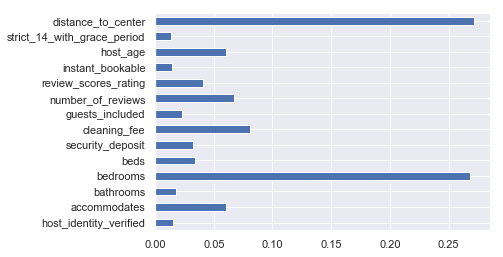

In [23]:
(pd.Series(dt_reg.feature_importances_, index=X.columns)
   .plot(kind='barh'))  

In [24]:
# Make predictions using the testing set
y_pred = dt_reg.predict(X_test)
# The mean squared error
print("Mean squared error MSE: %.2f"
      % mean_squared_error(y_test, y_pred))
# The root of the mean squared error
print('Root Mean Squared Error RMSE: %.2f' % math.sqrt(mean_squared_error(y_test, y_pred)))
# The mean absolute error
print("Mean absolute error MAE: %.2f"
      % mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score R2: %.2f' % r2_score(y_test, y_pred))

Mean squared error MSE: 17338.48
Root Mean Squared Error RMSE: 131.68
Mean absolute error MAE: 40.60
Variance score R2: 0.84


## Random forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

# train the model
rf_reg = RandomForestRegressor(max_depth = 12, n_estimators = 100, random_state = 1)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [29]:
# Make predictions using the testing set
y_pred = rf_reg.predict(X_test)

# The mean squared error
print("Mean squared error MSE: %.2f"
      % mean_squared_error(y_test, y_pred))
# The root of the mean squared error
print('Root Mean Squared Error RMSE: %.2f' % math.sqrt(mean_squared_error(y_test, y_pred)))
# The mean absolute error
print("Mean absolute error MAE: %.2f"
      % mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score R2: %.2f' % r2_score(y_test, y_pred))

Mean squared error MSE: 38921.84
Root Mean Squared Error RMSE: 197.29
Mean absolute error MAE: 148.01
Variance score R2: 0.63


In [30]:
# get feature importances
featureImportances = list(zip(features, rf_reg.feature_importances_))
list(sorted(featureImportances, key = lambda x: x[1], reverse = True))

[('bedrooms', 0.4257771566688633),
 ('distance_to_center', 0.22831143010090474),
 ('accommodates', 0.08696474235367756),
 ('cleaning_fee', 0.08602144625212936),
 ('number_of_reviews', 0.03575272028001748),
 ('host_age', 0.02469515980914401),
 ('review_scores_rating', 0.023183815298741684),
 ('bathrooms', 0.020315792963300935),
 ('beds', 0.0199879169337907),
 ('security_deposit', 0.017917113381544753),
 ('guests_included', 0.015066359473505002),
 ('strict_14_with_grace_period', 0.00551153372330497),
 ('host_identity_verified', 0.005391254886636335),
 ('instant_bookable', 0.005103557874439043)]

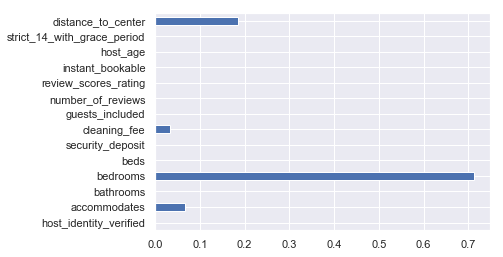

In [31]:
(pd.Series(dt_reg.feature_importances_, index=X.columns)
   .plot(kind='barh'))  

In [32]:
# train the model
rf_reg1 = RandomForestRegressor(bootstrap=True, max_depth = 9, n_estimators = 150, random_state = 0)
rf_reg1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [33]:
y_predict = rf_reg1.predict(X_test)
# The mean squared error
print("Mean squared error MSE: %.2f"
      % mean_squared_error(y_test, y_pred))
# The root of the mean squared error
print('Root Mean Squared Error RMSE: %.2f' % math.sqrt(mean_squared_error(y_test, y_pred)))
# The mean absolute error
print("Mean absolute error MAE: %.2f"
      % mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score R2: %.2f' % r2_score(y_test, y_pred))

Mean squared error MSE: 38921.84
Root Mean Squared Error RMSE: 197.29
Mean absolute error MAE: 148.01
Variance score R2: 0.63
